TP n° 8 - Classification. (Inspiré d'un tuto de Alexis Lechervy - Unicaen)
=====


Introduction
------


L'objectif de ce TP est de se familiariser avec les bases de python. Il sera à réaliser en python 3. Les bibliothèques utilisées sont installées sur les machines de l'ENSICAEN, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire `pip3` présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces bibliothèques, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

Langage utilisé:
- Python 3: https://docs.python.org/3/

Bibliothèques de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Bibliothèque d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Bibliothèque d'apprentissage automatique:
- Scikit-learn: http://scikit-learn.org


In [2]:
# Ce bloc contient les imports des différentes bibliothèques utiles pour ce TP. Vous pouvez exécuter ce bloc avec ctrl+Entrée.

# import outils mathématique
import numpy as np
from numpy.linalg import inv
import scipy as sc

# import fonction d'affichage
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D # pour la gestion de figure 3D
import matplotlib.patches as mpatches

# import fonction d'apprentissage automatique
import sklearn as sk
from sklearn import decomposition
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import *
from sklearn.metrics import *

# Autres imports
from functools import partial
from IPython.display import display, Math, Markdown


## 1 - Lecture d'une base de données<a id="title2.1"></a>

Nous allons utiliser dans cette partie, la base `Iris` (vous trouverez des informations complémentaires sur cette base à l'adresse http://archive.ics.uci.edu/ml/datasets/Iris). C'est une base comportant trois types d'Iris (Iris Setosa, Iris Versicolour et l'Iris Virginica). Chacune des fleurs est décrites par 4 attributs (la longueur et la largeur du sépale et du pétale). L'objectif est d'utiliser les différentes méthodes d'apprentissage pour distinguer les trois types d'Iris.

Commencez par charger la base de données à l'aide du code suivant :

In [5]:
data_iris  = load_iris()
features_iris = data_iris['data'] # Descripteurs de chaque fleur 
features_iris_names = data_iris['feature_names'] # nom de chaque attribut 
y_iris = data_iris['target'] # type de chaque fleur
y_iris_names = data_iris['target_names'] # nom de chaque type de fleur

Vous pouvez observer les distributions des longueurs et largeurs des sépales et pétales à l'aide du code suivant :

In [ ]:
# Visualisation des distributions des caractéristiques
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i in range(4):
    ax[i // 2, i % 2].hist([features_iris[y_iris == j, i] for j in range(3)],
                              bins=20, stacked=True, label=y_iris_names)
    ax[i // 2, i % 2].set_title('Distribution ' + features_iris_names[i])
    ax[i // 2, i % 2].legend()

plt.show()

Afficher le descripteur de la cinquième fleur de la base.

Descripteur de la fleur 5: [5.4 3.9 1.7 0.4]


Afficher le numéro du type de la cinquième fleur.

Type de la fleur 5: 0


Donnez les dimensions du sépale et du pétale de la cinquième fleur ainsi que le nom de son type.

Caractéristique de la fleur 5:

sepal length (cm): 5.4
sepal width (cm): 3.9
petal length (cm): 1.7
petal width (cm): 0.4

Type: Iris setosa


Dans un premier temps nous travaillerons uniquement avec les deux premières dimensions décrivant nos fleurs (la longueur et la largeur du sépale). Définissez `X_iris` contenant le descripteur de chaque fleur uniquement à partir des deux premières dimensions de `features_iris`.

Dimension de X_iris: (150, 2)


Affichez à l'écran les points de la base d'apprentissage en fonction uniquement de ces deux dimensions.

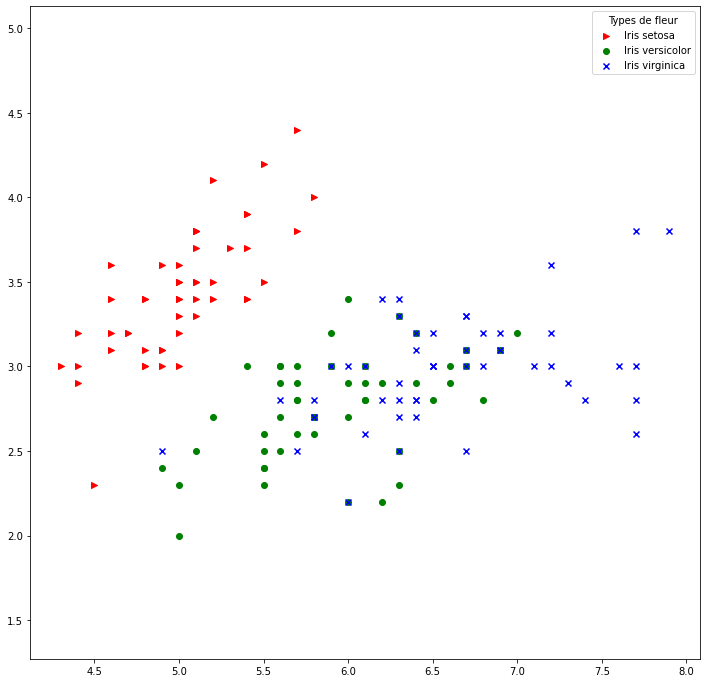

Que remarquez-vous sur la disposition des points de cette base ?

Sauvegardez les variables `X_iris`, `y_iris` et `y_iris_names` dans le fichier `iris.npy` avec la fonction `np.savez` (https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html#numpy.savez). 

## 2 - Apprentissage et classification <a id="title2.2"></a>

Si vous n'avez pas fait la partie de chargement des données de la base iris, récupérer les variables du fichier `iris.npy` à l'aide de la fonction `np.load`.

In [11]:
npzfile = np.load('iris.npz')
X_iris=npzfile['X_iris']
y_iris=npzfile['y_iris']
y_iris_names = npzfile['y_iris_names']

### 2.1 - Les k-plus-proche-voisins (kNN)<a id="title2.2.1"></a>

Nous allons commencer par classer notre base à l'aide de la méthode kNN. 

Réalisez l'apprentissage d'un kNN avec 5 voisins. Pour cela, vous devez utiliser la classe `KNeighborsClassifier` de sckit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html ). 

Pour effectuer l'apprentissage d'un classifieur sous scikit-learn, vous devez déclarer le classifieur avec ses paramètres puis effectuer l'apprentissage sur les données d'entrainement avec la fonction `fit`:

In [12]:
clf = ?
clf.fit(?,?) 

KNeighborsClassifier()

Affichez ensuite le résultat du classifieur en découpant l'espace en trois parties correspondants à chacune des classes en utilisant le code suivant : 

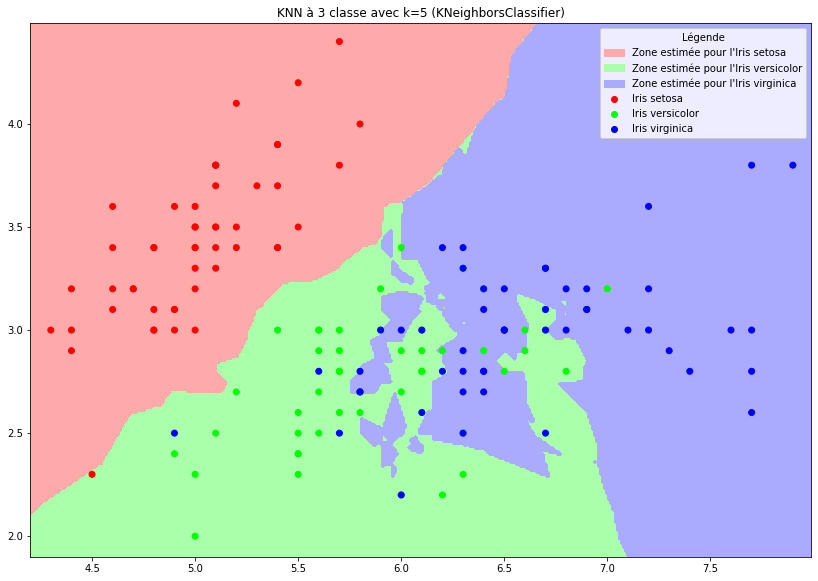

In [13]:
cmap_light = ['#FFAAAA', '#AAFFAA', '#AAAAFF']
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']
h = .01  # step size in the mesh

def plot_classifieur(X,y,clf,title):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(14,14))
    #plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(cmap_light))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(cmap_light))  # ou plt.contour pour afficher uniquement les frontières des classes
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.axis('scaled')

    color_patch = ['',]*6

    for i in range(3):
        color_patch[i] = mpatches.Patch(color=cmap_light[i], label='Zone estimée pour l\'Iris '+y_iris_names[i])

    for i in range(3):
        color_patch[i+3] = plt.scatter([],[],color=cmap_bold[i], label='Iris '+y_iris_names[i])

    plt.legend(handles=color_patch,title='Légende')

    plt.show()

plot_classifieur(X_iris,y_iris,clf,'KNN à 3 classe avec k=5 (KNeighborsClassifier)')

Le classifieur kNN de `scikit-learn` admet plusieurs paramètres notamment le nombre de voisins et le type de pondération de ces derniers. La pondération uniforme que vous venez d'utiliser permet de donner la même importance à chaque voisin dans le vote de la classe de l'exemple. Vous pouvez changer ce poids en donnant plus d'importance aux exemples les plus proches du point à tester et moins d'importance aux exemples plus éloignés. Pour cela changez l'option `weights='uniform'` par `weights='distance'`.

### 2.2 - Le Perceptron<a id="title2.2.2"></a>

Nous allons changer de type de classifieur. Réaliser les mêmes opérations que précédemment avec un perceptron. Utilisez pour cela la classe `Perceptron` de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) avec un nombre d'itérations max à 1000. 

Perceptron(tol=-inf)

Faites en sorte d'obtenir un affichage similaire à la partie précédente.

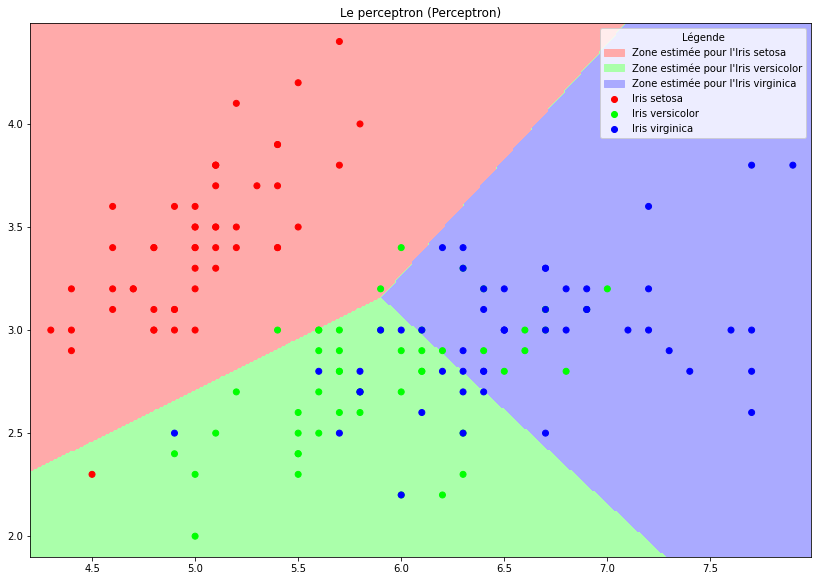

### 2.3 - Le Classifieur SVM<a id="title2.2.3"></a>

Nous allons dans cette partie tester plusieurs versions et paramètres de SVM. 

Commencez par tester l'implémentation par défaut d'un SVM. Pour cela utilisez la classe `svm.SVC` de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html ).

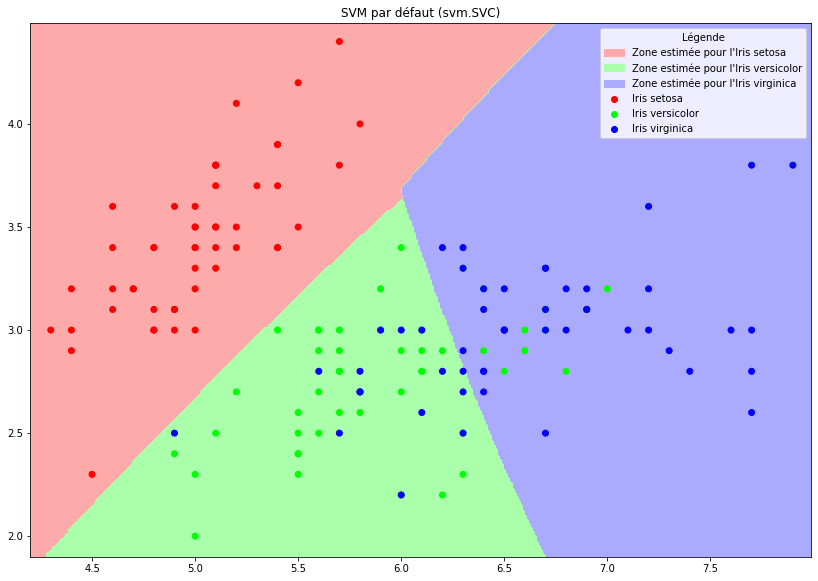

En utilisant la documentation testez des SVM avec les paramètres suivants:
- Noyau: linéaire, C=1.0,
- Noyau: RBF, C=1.0, $\gamma = 0.7$,
- Noyau: Polynomial, C=1.0, degree: 3

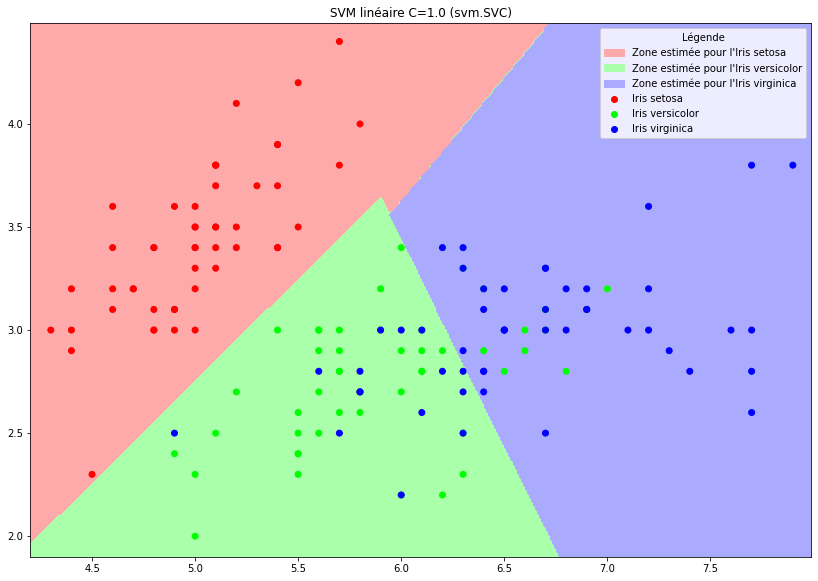

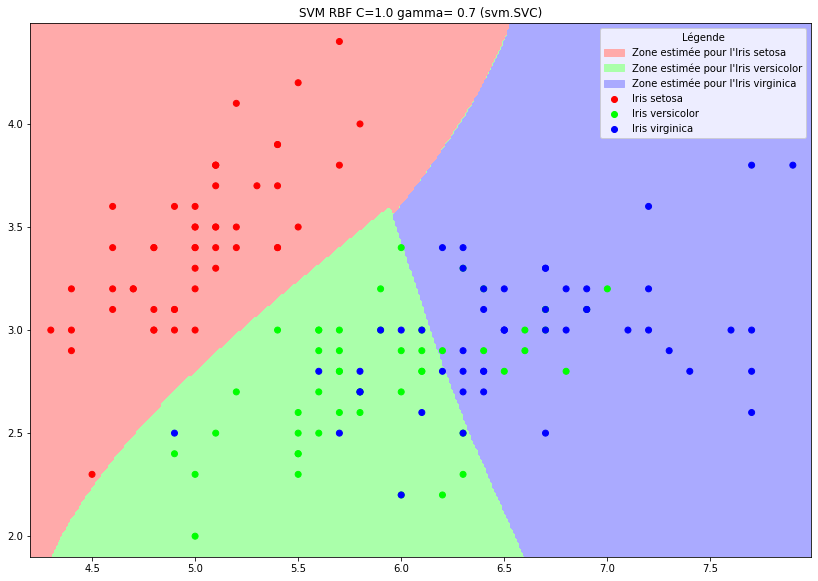

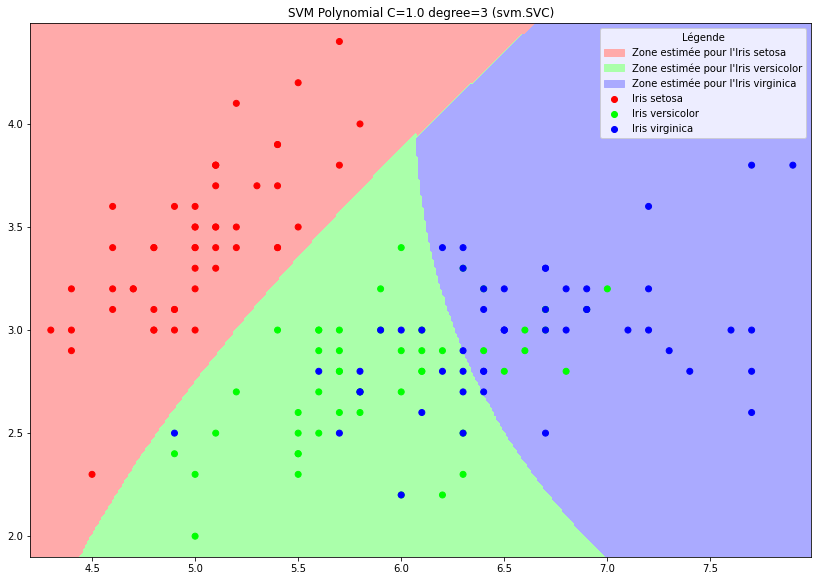

La bibliothèque scikit-learn propose deux implémentations pour les SVM linéaires. Nous venons de voir dans la question précédente la solution à l'aide de la classe `svm.SVC`. Testez la solution alternative `svm.LinearSVC` (https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html ). Cette fonction n'est disponible que pour des SVM linéaires et peut donner des résultats légèrement différents de la précédente.

/home/lechervy/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


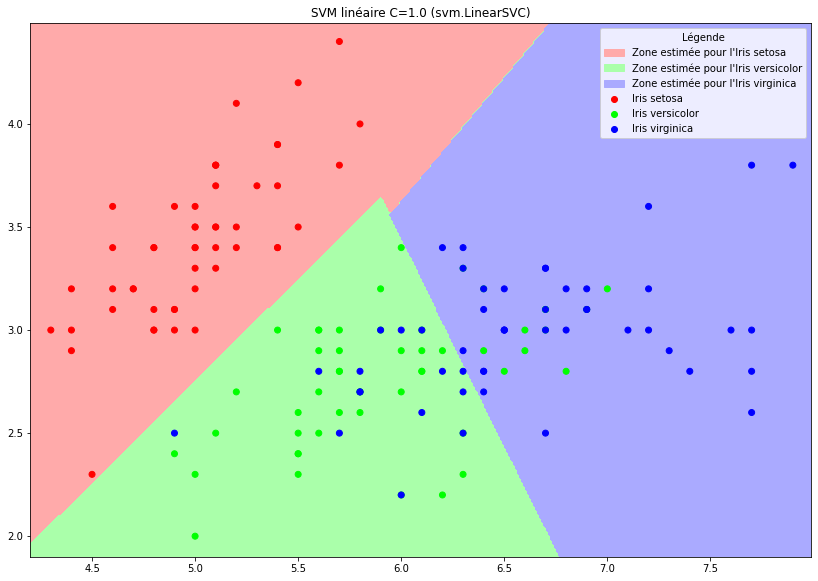

Changez les paramètres des noyaux et regardez comment est modifiée la séparation des classes.